In [1]:
# Import the necessary functions
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Dropout, MaxPool2D, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import os
from tensorflow.keras.models import load_model
from keras import applications
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [17]:
# Define the train and validation subsets
train_path = 'RoadImages/train'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(train_path, target_size = (400,400), classes = ['road', 'sidewalk'], batch_size = 10)
valid_path = 'RoadImages/valid'
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size = (400,400), classes = ['road', 'sidewalk'], batch_size = 10)

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [4]:
# Define the model into a variable
resnet_model = applications.resnet50.ResNet50(weights=None, include_top=False, input_shape=(400,400,3))

C:\Users\ppaau\anaconda3\envs\Final_project\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
# Define the parameters of the model
num_classes=2
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.35)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model1 = Model(inputs = resnet_model.input, outputs = predictions)

In [6]:
# Import the optimizer and define it into a variable
from keras.optimizers import SGD, Adam
adam = Adam()
model1.compile(optimizer=adam, loss='categorical_crossentropy')

In [18]:
# Initial training of the model for one epoch
model1.fit(train_batches, validation_data=valid_batches, epochs=5)

Epoch 1/1
  1/200 [..............................] - ETA: 9:00:29 - loss: 0.3361

KeyboardInterrupt: 

In [5]:
# Define the test subset
test_path = 'E:\Docs\Academic\IronHack\Projects\Project-Week-8-Travelling-With-Wheelchair\RoadImages/test'
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(test_path, target_size = (400,400), classes = ['road', 'sidewalk'], batch_size = 10)

Found 400 images belonging to 2 classes.


In [9]:
# Predict the classes of the test images
predictions = model1.predict(test_batches)

In [62]:
# Save the model
model1.save('road_model_detection.h5')

In [8]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 4]
 [0 6]]


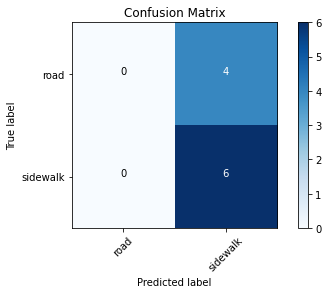

In [12]:
# Define the parameters and plot the function
test_labels = test_batches.classes
cm = confusion_matrix(y_true=test_labels, y_pred=np.argmax(np.round(predictions), axis=1))
cm_plot_labels = ['road','sidewalk']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [2]:
# We check the model with the retraining
retrained_model = load_model('E:\Docs\Academic\IronHack\Projects\Project-Week-8-Travelling-With-Wheelchair/road_model_detection.h5')

In [6]:
predictions = retrained_model.predict(test_batches)

Confusion matrix, without normalization
[[ 95 105]
 [106  94]]


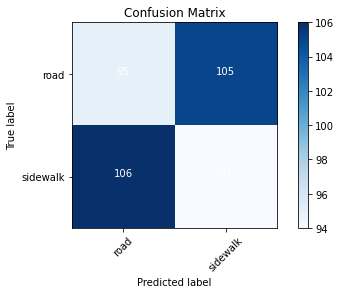

In [9]:
test_labels = test_batches.classes
cm = confusion_matrix(y_true=test_labels, y_pred=np.argmax(np.round(predictions), axis=1))
cm_plot_labels = ['road','sidewalk']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')